In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,8
plt.style.use('ggplot')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
humidity=pd.read_csv('weather_data/humidity.csv', parse_dates=True, index_col='datetime')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [3]:
humidity = humidity.iloc[1:]
humidity=humidity.ffill()

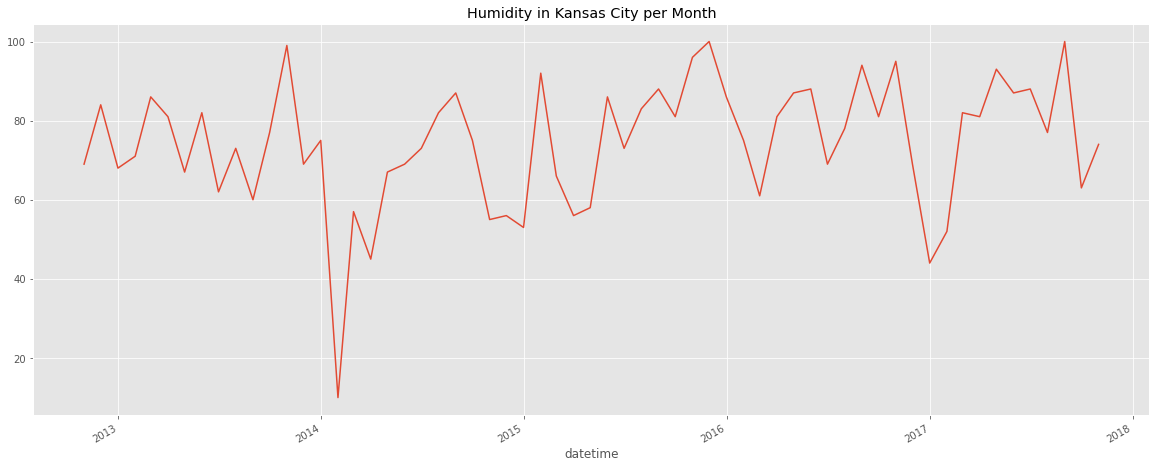

In [4]:
humidity["Kansas City"].asfreq('M').plot()
plt.title('Humidity in Kansas City per Month');

## Checking for Stationarity

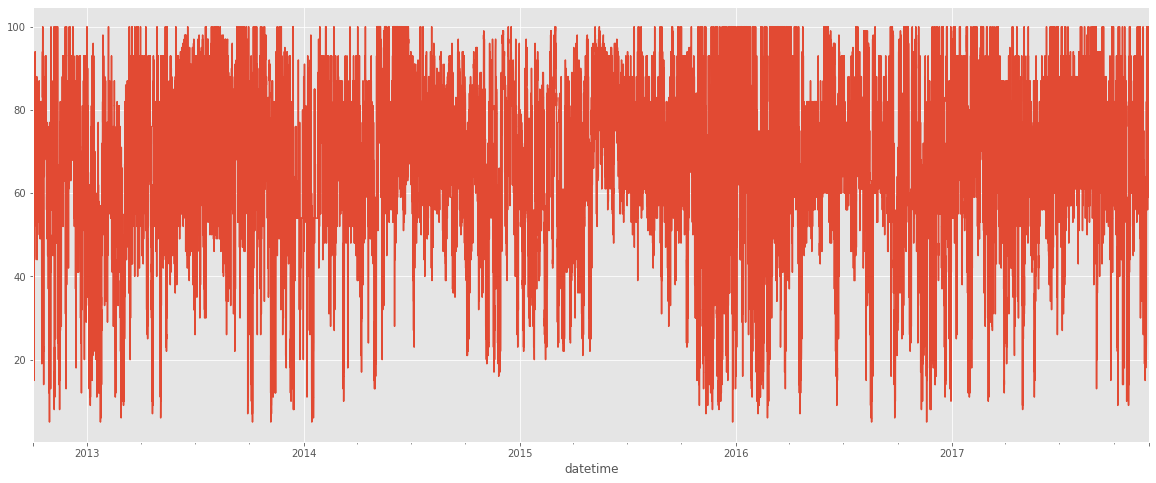

In [5]:
humidity['San Diego'].plot();

# data is stationary

In [6]:
humidity.index

DatetimeIndex(['2012-10-01 13:00:00', '2012-10-01 14:00:00',
               '2012-10-01 15:00:00', '2012-10-01 16:00:00',
               '2012-10-01 17:00:00', '2012-10-01 18:00:00',
               '2012-10-01 19:00:00', '2012-10-01 20:00:00',
               '2012-10-01 21:00:00', '2012-10-01 22:00:00',
               ...
               '2017-11-29 15:00:00', '2017-11-29 16:00:00',
               '2017-11-29 17:00:00', '2017-11-29 18:00:00',
               '2017-11-29 19:00:00', '2017-11-29 20:00:00',
               '2017-11-29 21:00:00', '2017-11-29 22:00:00',
               '2017-11-29 23:00:00', '2017-11-30 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=45252, freq=None)

## ACF & PACF

In [7]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

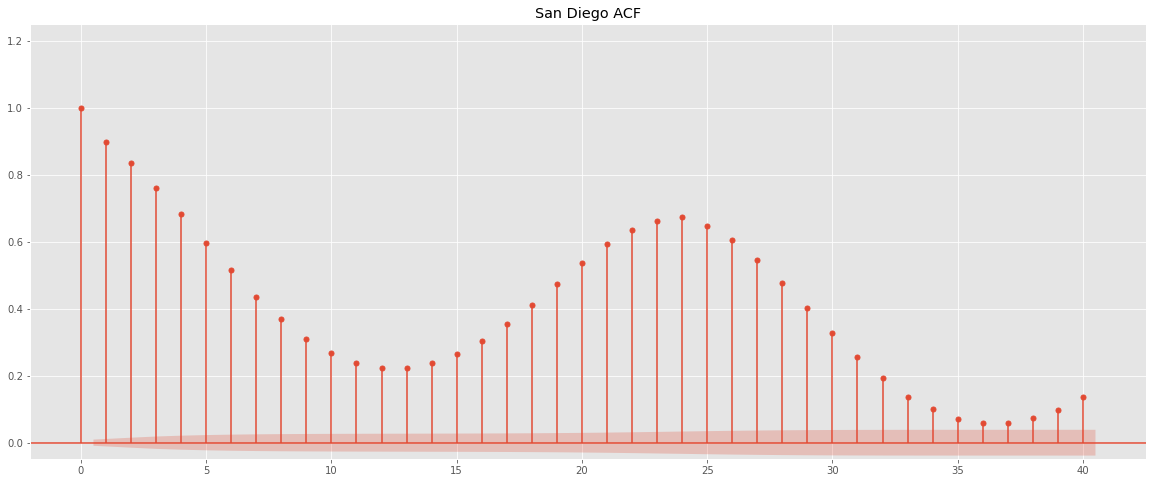

In [14]:
plot_acf(humidity['San Diego'], lags=40, title='San Diego ACF', auto_ylims=True);

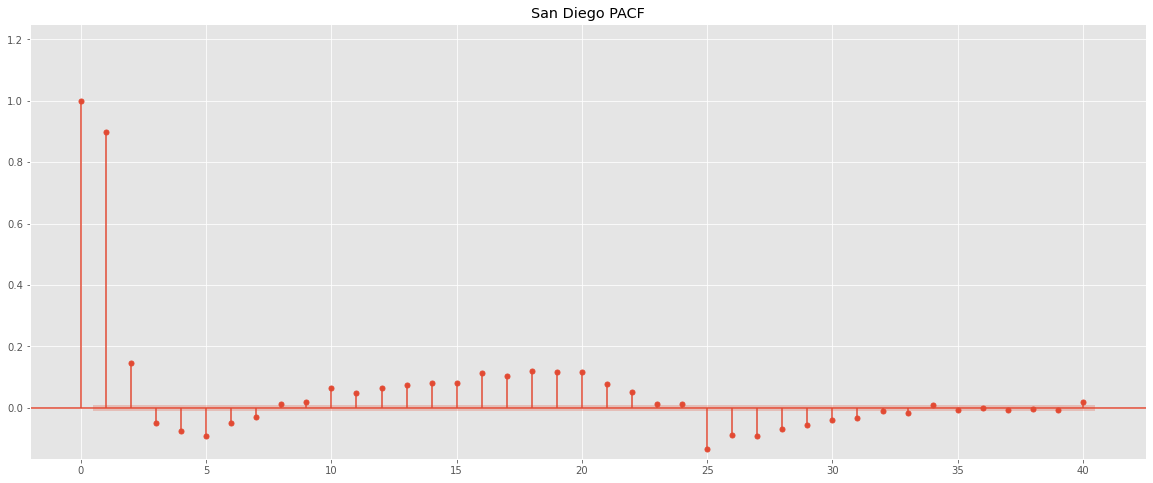

In [15]:
plot_pacf(humidity['San Diego'], lags=40, title='San Diego PACF',auto_ylims=True);

# Seasonal Decompose

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

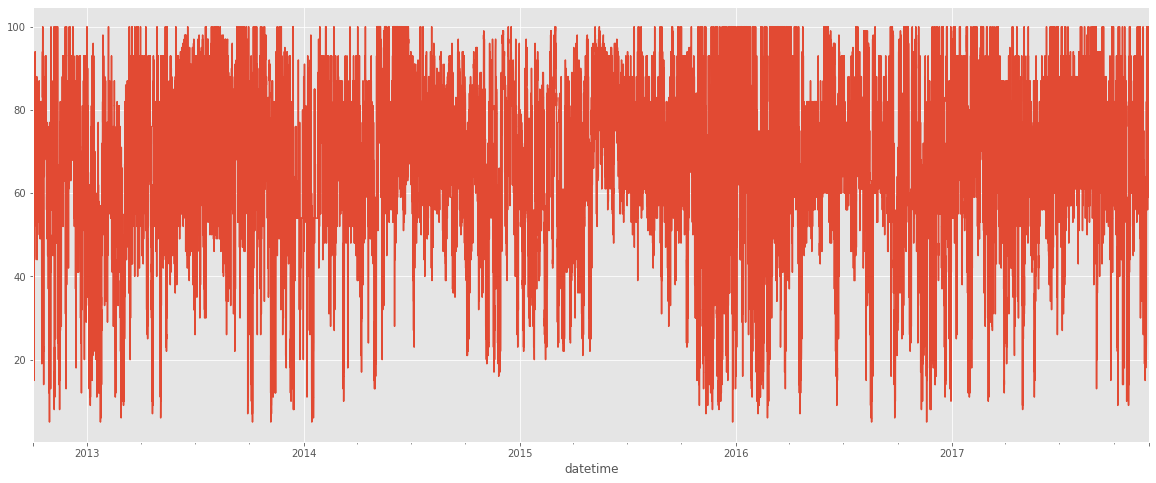

In [11]:
humidity['San Diego'].plot();

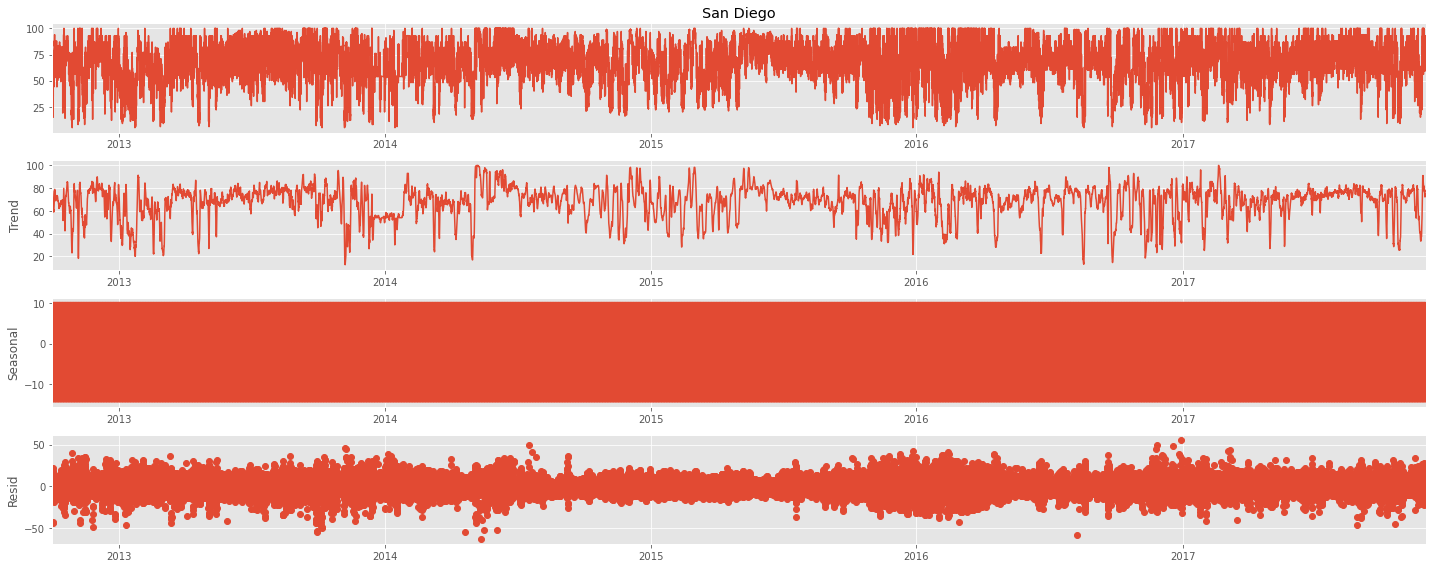

In [12]:
h_sd=seasonal_decompose(humidity['San Diego'])
h_sd.plot();

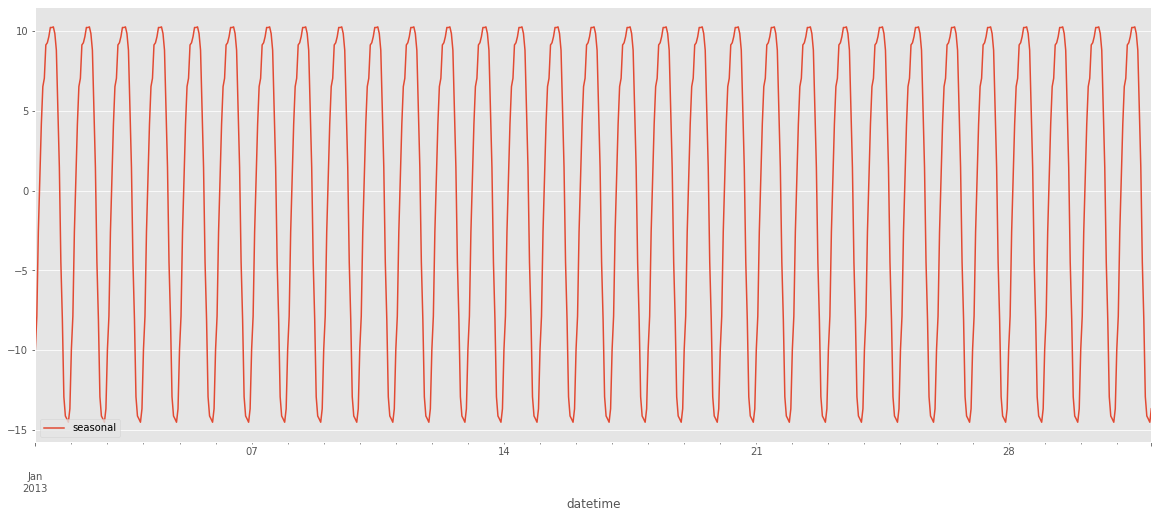

In [19]:
x=pd.DataFrame(h_sd.seasonal)
x['2013-01'].plot();

# ARIMA

In [22]:
x=humidity[['San Diego']]
x.head(20)

,San Diego
datetime,
2012-10-01 13:00:00,82.0
2012-10-01 14:00:00,81.0
2012-10-01 15:00:00,81.0
2012-10-01 16:00:00,81.0
2012-10-01 17:00:00,80.0
2012-10-01 18:00:00,80.0
2012-10-01 19:00:00,80.0
2012-10-01 20:00:00,79.0
2012-10-01 21:00:00,79.0


In [23]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of sampling rate.
    """
    if len(entry):  # handles the case of missing data
        return entry[0]

In [24]:
x=x.resample(rule='D').apply(first_day)

In [25]:
x.index

DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-06', '2012-10-07', '2012-10-08',
               '2012-10-09', '2012-10-10',
               ...
               '2017-11-21', '2017-11-22', '2017-11-23', '2017-11-24',
               '2017-11-25', '2017-11-26', '2017-11-27', '2017-11-28',
               '2017-11-29', '2017-11-30'],
              dtype='datetime64[ns]', name='datetime', length=1887, freq='D')

In [26]:
x.head()

,San Diego
datetime,
2012-10-01,82.0
2012-10-02,78.0
2012-10-03,61.0
2012-10-04,51.0
2012-10-05,73.0


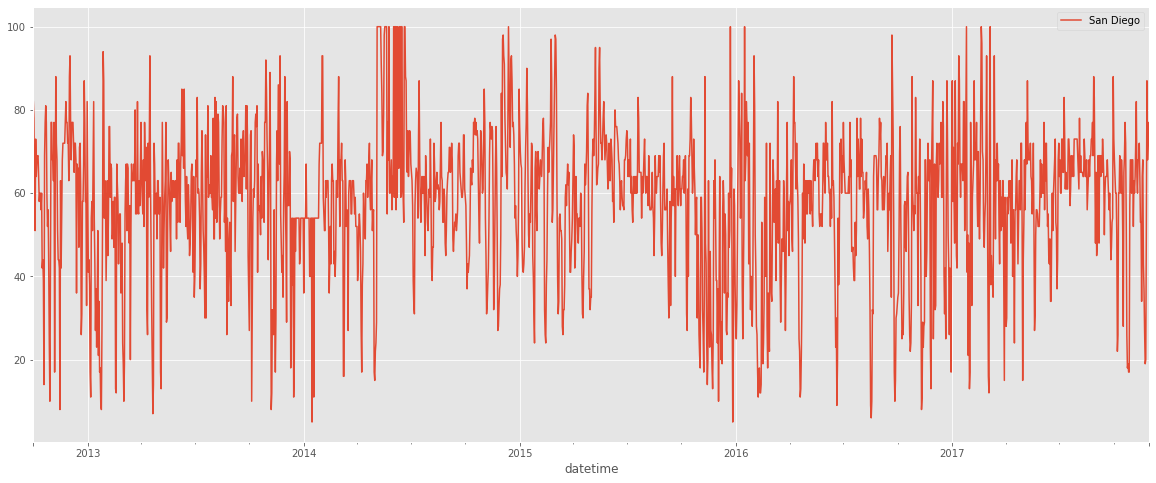

In [27]:
x.plot();

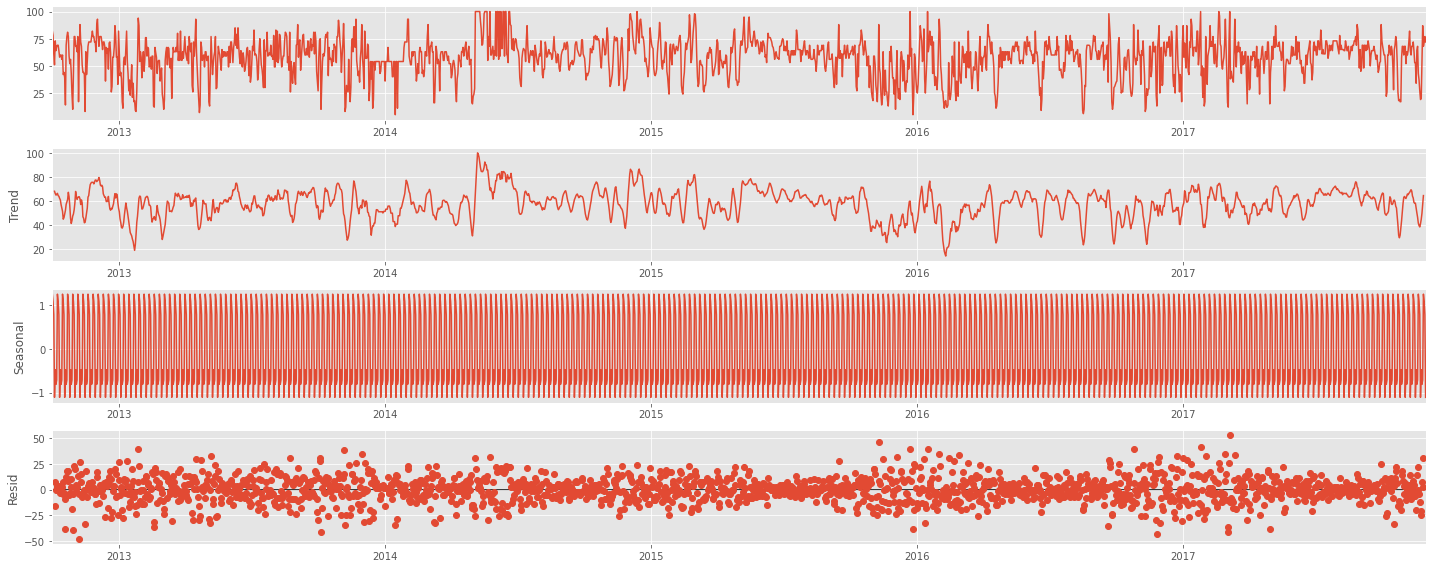

In [28]:
seasonal_decompose(x).plot();

In [29]:
from pmdarima import auto_arima

In [42]:
stepwise_fit=auto_arima(x['San Diego'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16202.014, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15340.687, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15541.257, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20838.282, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=15341.972, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15341.892, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=15344.039, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=15723.168, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.097 seconds


In [32]:
len(x)*0.8

1509.6000000000001

In [33]:
train=x.iloc[:1500]
test=x.iloc[1500:]

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

model=sm.tsa.arima.ARIMA(train['San Diego'], order=(1,0,0))

In [45]:
results=model.fit()

In [46]:
start=len(train)
end=len(train)+len(test)-1

In [47]:
predictions=results.predict(start,end,typ='levels').rename('AARIMA Predictions')

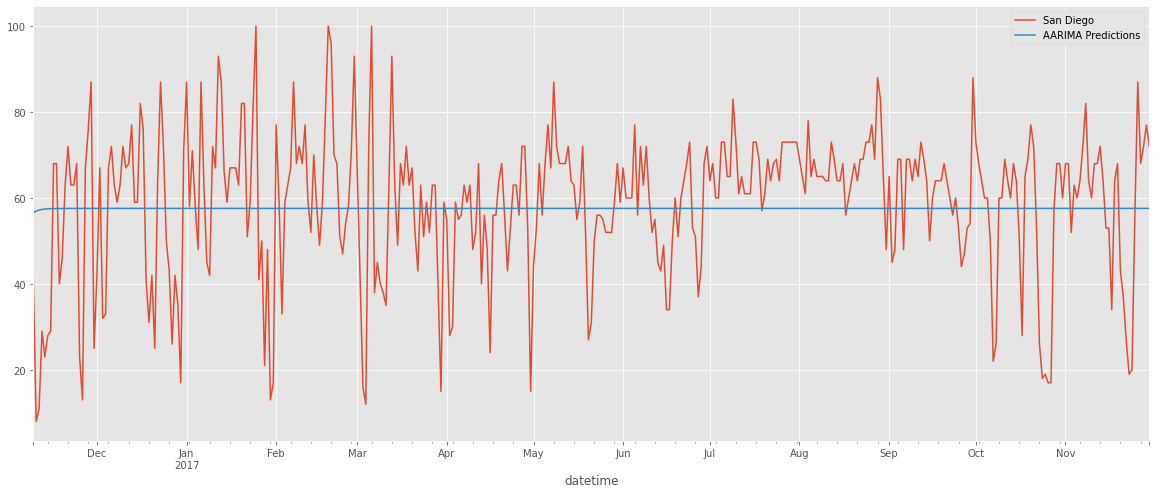

In [48]:
test['San Diego'].plot(legend=True)
predictions.plot(legend=True);

In [49]:
test['San Diego'].mean()

58.77260981912145

In [50]:
predictions.mean()

57.570791732364775

In [39]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [40]:
adf_test(x['San Diego'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -21.514909
p-value                    0.000000
# lags used                0.000000
# observations          1886.000000
critical value (1%)       -3.433822
critical value (5%)       -2.863074
critical value (10%)      -2.567586
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
